<a href="https://colab.research.google.com/github/VijayNale/incident_prediction/blob/master/incidentNew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import tensorflow as  tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [5]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

SystemError: ignored

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
train = pd.read_csv("/content/drive/My Drive/Incident/train.csv")
test = pd.read_csv("/content/drive/My Drive/Incident/test.csv")

In [51]:
train.head()

,Unnamed: 0,ID,ID_status,active,count_reassign,count_opening,count_updated,ID_caller,opened_by,opened_time,Created_by,created_at,updated_by,updated_at,type_contact,location,category_ID,user_symptom,Support_group,support_incharge,Doc_knowledge,confirmation_check,impact,notify,problem_ID,change_request
0,1,INC0000045,New,True,0,0,0,Caller 2403,Opened by 8,29-02-2016 01:16,Created by 6,29-02-2016 01:23,Updated by 21,29-02-2016 01:23,Phone,Location 143,Category 55,Symptom 72,Group 56,?,True,False,2 - Medium,Do Not Notify,?,?
1,3,INC0000045,Resolved,True,0,0,3,Caller 2403,Opened by 8,29-02-2016 01:16,Created by 6,29-02-2016 01:23,Updated by 804,29-02-2016 11:29,Phone,Location 143,Category 55,Symptom 72,Group 56,?,True,False,2 - Medium,Do Not Notify,?,?
2,4,INC0000045,Closed,False,0,0,4,Caller 2403,Opened by 8,29-02-2016 01:16,Created by 6,29-02-2016 01:23,Updated by 908,05-03-2016 12:00,Phone,Location 143,Category 55,Symptom 72,Group 56,?,True,False,2 - Medium,Do Not Notify,?,?
3,6,INC0000047,Active,True,1,0,1,Caller 2403,Opened by 397,29-02-2016 04:40,Created by 171,29-02-2016 04:57,Updated by 21,29-02-2016 05:30,Phone,Location 165,Category 40,Symptom 471,Group 24,Resolver 31,True,False,2 - Medium,Do Not Notify,?,?
4,7,INC0000047,Active,True,1,0,2,Caller 2403,Opened by 397,29-02-2016 04:40,Created by 171,29-02-2016 04:57,Updated by 21,29-02-2016 05:33,Phone,Location 165,Category 40,Symptom 471,Group 24,Resolver 31,True,False,2 - Medium,Do Not Notify,?,?


In [52]:
test.head()

,S.No,ID,ID_status,active,count_reassign,count_opening,count_updated,ID_caller,opened_by,opened_time,Created_by,created_at,updated_by,updated_at,type_contact,location,category_ID,user_symptom,Support_group,support_incharge,Doc_knowledge,confirmation_check,notify,problem_ID,change_request
0,1,INC0000045,Resolved,True,0,0,2,Caller 2403,Opened by 8,29-02-2016 01:16,Created by 6,29-02-2016 01:23,Updated by 642,29-02-2016 08:53,Phone,Location 143,Category 55,Symptom 72,Group 56,?,True,False,Do Not Notify,?,?
1,2,INC0000047,New,True,0,0,0,Caller 2403,Opened by 397,29-02-2016 04:40,Created by 171,29-02-2016 04:57,Updated by 746,29-02-2016 04:57,Phone,Location 165,Category 40,Symptom 471,Group 70,Resolver 89,True,False,Do Not Notify,?,?
2,3,INC0000047,Active,True,1,0,3,Caller 2403,Opened by 397,29-02-2016 04:40,Created by 171,29-02-2016 04:57,Updated by 804,29-02-2016 11:31,Phone,Location 165,Category 40,Symptom 471,Group 24,Resolver 31,True,False,Do Not Notify,?,?
3,4,INC0000047,Resolved,True,1,0,7,Caller 2403,Opened by 397,29-02-2016 04:40,Created by 171,29-02-2016 04:57,Updated by 332,01-03-2016 09:52,Phone,Location 165,Category 40,Symptom 471,Group 24,Resolver 89,True,False,Do Not Notify,?,?
4,5,INC0000057,New,True,0,0,4,Caller 4416,Opened by 8,29-02-2016 06:10,?,?,Updated by 21,01-03-2016 02:54,Phone,Location 204,Category 20,Symptom 471,Group 70,?,True,False,Do Not Notify,Problem ID 2,?


In [0]:
# These varible not giving more information 
#Unnamed: 0 has indexing and crated_at and updated_at has date time
#problem_id and change_request has too much null values
train.drop(['Unnamed: 0','created_at','updated_at','problem_ID','change_request'], axis=1 , inplace =True)
test.drop(['S.No','created_at','updated_at','problem_ID','change_request'], axis=1 , inplace =True)

In [54]:
train.shape

(99198, 21)

In [55]:
test.shape

(42514, 20)

In [56]:
train.columns , test.columns

(Index(['ID', 'ID_status', 'active', 'count_reassign', 'count_opening',
        'count_updated', 'ID_caller', 'opened_by', 'opened_time', 'Created_by',
        'updated_by', 'type_contact', 'location', 'category_ID', 'user_symptom',
        'Support_group', 'support_incharge', 'Doc_knowledge',
        'confirmation_check', 'impact', 'notify'],
       dtype='object'),
 Index(['ID', 'ID_status', 'active', 'count_reassign', 'count_opening',
        'count_updated', 'ID_caller', 'opened_by', 'opened_time', 'Created_by',
        'updated_by', 'type_contact', 'location', 'category_ID', 'user_symptom',
        'Support_group', 'support_incharge', 'Doc_knowledge',
        'confirmation_check', 'notify'],
       dtype='object'))

In [57]:
#do constant value imputation(0) all varibles
for col in train.columns:
    train.loc[train[col] == '?', col] = '0'

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99198 entries, 0 to 99197
Data columns (total 21 columns):
ID                    99198 non-null object
ID_status             99198 non-null object
active                99198 non-null bool
count_reassign        99198 non-null int64
count_opening         99198 non-null int64
count_updated         99198 non-null int64
ID_caller             99198 non-null object
opened_by             99198 non-null object
opened_time           99198 non-null object
Created_by            99198 non-null object
updated_by            99198 non-null object
type_contact          99198 non-null object
location              99198 non-null object
category_ID           99198 non-null object
user_symptom          99198 non-null object
Support_group         99198 non-null object
support_incharge      99198 non-null object
Doc_knowledge         99198 non-null bool
confirmation_check    99198 non-null bool
impact                99198 non-null object
notify              

In [59]:
#do constant value imputation(0) all varibles
for col in test.columns:
    test.loc[test[col] == '?', col] = 0

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [22]:
train

,ID,ID_status,active,count_reassign,count_opening,count_updated,ID_caller,opened_by,opened_time,Created_by,updated_by,type_contact,location,category_ID,user_symptom,Support_group,support_incharge,Doc_knowledge,confirmation_check,impact,notify
0,INC0000045,New,True,0,0,0,Caller 2403,Opened by 8,29-02-2016 01:16,Created by 6,Updated by 21,Phone,Location 143,Category 55,Symptom 72,Group 56,0,True,False,2 - Medium,Do Not Notify
1,INC0000045,Resolved,True,0,0,3,Caller 2403,Opened by 8,29-02-2016 01:16,Created by 6,Updated by 804,Phone,Location 143,Category 55,Symptom 72,Group 56,0,True,False,2 - Medium,Do Not Notify
2,INC0000045,Closed,False,0,0,4,Caller 2403,Opened by 8,29-02-2016 01:16,Created by 6,Updated by 908,Phone,Location 143,Category 55,Symptom 72,Group 56,0,True,False,2 - Medium,Do Not Notify
3,INC0000047,Active,True,1,0,1,Caller 2403,Opened by 397,29-02-2016 04:40,Created by 171,Updated by 21,Phone,Location 165,Category 40,Symptom 471,Group 24,Resolver 31,True,False,2 - Medium,Do Not Notify
4,INC0000047,Active,True,1,0,2,Caller 2403,Opened by 397,29-02-2016 04:40,Created by 171,Updated by 21,Phone,Location 165,Category 40,Symptom 471,Group 24,Resolver 31,True,False,2 - Medium,Do Not Notify
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99193,INC0120835,Resolved,True,1,0,3,Caller 116,Opened by 12,16-02-2017 09:09,0,Updated by 27,Email,Location 204,Category 42,Symptom 494,Group 31,Resolver 10,False,True,2 - Medium,Do Not Notify
99194,INC0120835,Closed,False,1,0,4,Caller 116,Opened by 12,16-02-2017 09:09,0,Updated by 27,Email,Location 204,Category 42,Symptom 494,Group 31,Resolver 10,False,True,2 - Medium,Do Not Notify
99195,INC0121064,Active,True,0,0,0,Caller 116,Opened by 12,16-02-2017 14:17,0,Updated by 908,Email,Location 204,Category 42,Symptom 494,Group 70,Resolver 10,False,False,2 - Medium,Do Not Notify
99196,INC0121064,Active,True,1,0,1,Caller 116,Opened by 12,16-02-2017 14:17,0,Updated by 60,Email,Location 204,Category 42,Symptom 494,Group 31,0,False,False,2 - Medium,Do Not Notify


In [23]:
test

,ID,ID_status,active,count_reassign,count_opening,count_updated,ID_caller,opened_by,opened_time,Created_by,updated_by,type_contact,location,category_ID,user_symptom,Support_group,support_incharge,Doc_knowledge,confirmation_check,notify
0,INC0000045,Resolved,True,0,0,2,Caller 2403,Opened by 8,29-02-2016 01:16,Created by 6,Updated by 642,Phone,Location 143,Category 55,Symptom 72,Group 56,0,True,False,Do Not Notify
1,INC0000047,New,True,0,0,0,Caller 2403,Opened by 397,29-02-2016 04:40,Created by 171,Updated by 746,Phone,Location 165,Category 40,Symptom 471,Group 70,Resolver 89,True,False,Do Not Notify
2,INC0000047,Active,True,1,0,3,Caller 2403,Opened by 397,29-02-2016 04:40,Created by 171,Updated by 804,Phone,Location 165,Category 40,Symptom 471,Group 24,Resolver 31,True,False,Do Not Notify
3,INC0000047,Resolved,True,1,0,7,Caller 2403,Opened by 397,29-02-2016 04:40,Created by 171,Updated by 332,Phone,Location 165,Category 40,Symptom 471,Group 24,Resolver 89,True,False,Do Not Notify
4,INC0000057,New,True,0,0,4,Caller 4416,Opened by 8,29-02-2016 06:10,0,Updated by 21,Phone,Location 204,Category 20,Symptom 471,Group 70,0,True,False,Do Not Notify
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42509,INC0119457,Closed,False,0,0,1,Caller 2403,Opened by 508,13-02-2017 11:31,0,Updated by 931,IVR,Location 246,Category 50,Symptom 533,Group 70,0,False,False,Do Not Notify
42510,INC0119983,New,True,0,0,0,Caller 831,Opened by 508,14-02-2017 11:11,0,Updated by 908,IVR,Location 246,Category 50,Symptom 533,Group 70,0,False,False,Do Not Notify
42511,INC0120303,New,True,0,0,0,Caller 1866,Opened by 508,15-02-2017 01:52,0,Updated by 908,IVR,Location 246,Category 50,Symptom 533,Group 70,0,False,False,Do Not Notify
42512,INC0120319,New,True,0,0,0,Caller 1899,Opened by 508,15-02-2017 07:09,0,Updated by 908,IVR,Location 246,Category 50,Symptom 533,Group 70,0,False,False,Do Not Notify


In [60]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99198 entries, 0 to 99197
Data columns (total 21 columns):
ID                    99198 non-null object
ID_status             99198 non-null object
active                99198 non-null bool
count_reassign        99198 non-null int64
count_opening         99198 non-null int64
count_updated         99198 non-null int64
ID_caller             99198 non-null object
opened_by             99198 non-null object
opened_time           99198 non-null object
Created_by            99198 non-null object
updated_by            99198 non-null object
type_contact          99198 non-null object
location              99198 non-null object
category_ID           99198 non-null object
user_symptom          99198 non-null object
Support_group         99198 non-null object
support_incharge      99198 non-null object
Doc_knowledge         99198 non-null bool
confirmation_check    99198 non-null bool
impact                99198 non-null object
notify              

In [0]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train['ID'] = le.fit_transform(train['ID'])
train['ID_status'] = le.fit_transform(train['ID_status'])
train['ID_caller'] = le.fit_transform(train['ID_caller'])
train['opened_by'] = le.fit_transform(train['opened_by'])
train['opened_time'] = le.fit_transform(train['opened_time'])
train['Created_by'] = le.fit_transform(train['Created_by'])
train['updated_by'] = le.fit_transform(train['updated_by'])
train['type_contact'] = le.fit_transform(train['type_contact'])
train['location'] = le.fit_transform(train['location'])
train['category_ID'] = le.fit_transform(train['category_ID'])
train['user_symptom'] = le.fit_transform(train['user_symptom'])
train['Support_group'] = le.fit_transform(train['Support_group'])
train['active'] = le.fit_transform(train['active'])
train['Doc_knowledge'] = le.fit_transform(train['Doc_knowledge'])
train['confirmation_check'] = le.fit_transform(train['confirmation_check'])



In [65]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99198 entries, 0 to 99197
Data columns (total 21 columns):
ID                    99198 non-null int64
ID_status             99198 non-null int64
active                99198 non-null int64
count_reassign        99198 non-null int64
count_opening         99198 non-null int64
count_updated         99198 non-null int64
ID_caller             99198 non-null int64
opened_by             99198 non-null int64
opened_time           99198 non-null int64
Created_by            99198 non-null int64
updated_by            99198 non-null int64
type_contact          99198 non-null int64
location              99198 non-null int64
category_ID           99198 non-null int64
user_symptom          99198 non-null int64
Support_group         99198 non-null int64
support_incharge      99198 non-null int64
Doc_knowledge         99198 non-null int64
confirmation_check    99198 non-null int64
impact                99198 non-null int64
notify                99198 non

In [66]:
train

,ID,ID_status,active,count_reassign,count_opening,count_updated,ID_caller,opened_by,opened_time,Created_by,updated_by,type_contact,location,category_ID,user_symptom,Support_group,support_incharge,Doc_knowledge,confirmation_check,impact,notify
0,0,7,1,0,0,0,1456,201,17638,152,94,3,44,45,492,47,0,1,0,1,0
1,0,8,1,0,0,3,1456,201,17638,152,585,3,44,45,492,47,0,1,0,1,0
2,0,6,0,0,0,4,1456,201,17638,152,681,3,44,45,492,47,0,1,0,1,0
3,1,1,1,1,0,1,1456,121,17639,59,94,3,63,30,345,15,165,1,0,1,0
4,1,1,1,1,0,2,1456,121,17639,59,94,3,63,30,345,15,165,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99193,24567,8,1,1,0,3,166,10,10133,0,145,1,105,32,361,23,1,0,1,1,0
99194,24567,6,0,1,0,4,166,10,10133,0,145,1,105,32,361,23,1,0,1,1,0
99195,24568,1,1,0,0,0,166,10,10134,0,681,1,105,32,361,63,1,0,0,1,0
99196,24568,1,1,1,0,1,166,10,10134,0,416,1,105,32,361,23,0,0,0,1,0


In [0]:
from sklearn.model_selection import StratifiedShuffleSplit as sss
split = sss(n_splits = 5, test_size = 0.2 , random_state = 42)
for train_index , test_index in split.split(train, train['impact']):
    train_x = train.loc[train_index]
    train_y = train.loc[test_index]


In [75]:
train_x

,ID,ID_status,active,count_reassign,count_opening,count_updated,ID_caller,opened_by,opened_time,Created_by,updated_by,type_contact,location,category_ID,user_symptom,Support_group,support_incharge,Doc_knowledge,confirmation_check,impact,notify
25628,5172,4,1,3,0,13,4223,15,10848,155,612,3,218,14,358,14,120,0,0,2,0
47436,10614,1,1,0,0,0,2380,189,3842,125,26,3,222,43,0,0,167,0,0,1,0
93067,22961,1,1,0,0,1,1337,32,15320,0,286,3,44,13,328,11,0,0,0,1,0
67131,15870,6,0,1,0,6,3609,123,16660,86,681,3,44,16,358,19,211,0,1,1,0
69112,16436,7,1,0,0,0,1327,5,17559,0,681,3,222,34,358,41,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6565,1331,8,1,7,0,38,4935,0,1730,179,121,3,218,24,0,14,203,1,1,1,0
72056,17257,1,1,1,0,2,4916,5,1301,144,286,3,60,47,185,15,221,0,0,1,0
94308,23288,1,1,0,0,1,251,32,15969,0,511,3,105,36,0,58,78,0,0,1,0
95722,23685,8,1,0,0,2,3251,32,18830,2,303,3,105,43,358,16,28,0,1,1,0


In [76]:
train_y

,ID,ID_status,active,count_reassign,count_opening,count_updated,ID_caller,opened_by,opened_time,Created_by,updated_by,type_contact,location,category_ID,user_symptom,Support_group,support_incharge,Doc_knowledge,confirmation_check,impact,notify
35733,7591,6,0,0,0,2,2922,56,16987,4,681,3,60,27,358,40,23,0,1,1,0
53121,12081,7,1,0,0,0,4623,32,7733,0,681,3,60,25,0,63,0,0,0,1,0
70918,16936,8,1,1,0,3,4412,166,661,102,455,3,14,47,0,47,70,0,1,0,0
34804,7325,7,1,0,0,3,44,186,15210,123,24,3,105,27,358,63,215,0,0,1,0
73804,17733,6,0,0,0,3,5028,194,2045,138,681,3,97,27,358,35,214,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33546,7019,7,1,0,0,0,4724,119,14975,56,525,3,8,36,358,18,91,0,0,1,0
27244,5544,6,0,3,0,6,2544,32,11480,0,681,3,8,51,0,66,99,0,1,1,0
23748,4763,6,0,0,0,6,3609,123,10169,86,681,3,44,27,18,39,207,0,1,1,0
82947,20189,6,0,5,0,10,4767,32,8119,2,681,3,60,16,358,15,221,0,1,1,0


In [0]:
y = train_x['impact']
X = train_x.drop(['impact'], axis = 1)

y_t = train_y['impact']
X_t = train_y.drop(['impact'], axis = 1)

In [0]:
acc= []
for i in range(1,21,2):
    neigh = KNC(n_neighbors = i)
    neigh.fit(X,y)
    train_acc = np.mean(neigh.predict(X) == y)
    test_acc = np.mean(neigh.predict(X_t) == y_t)
    acc.append([train_acc, test_acc])


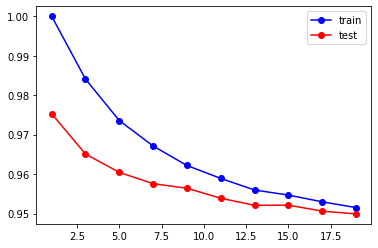

In [90]:
plt.plot(np.arange(1,21,2),[i[0] for i in acc], "bo-")
plt.plot(np.arange(1,21,2), [i[1] for i in acc], "ro-")
plt.legend(["train","test"])

In [163]:
near5 = KNC(n_neighbors = 9)
near5.fit(X, y)
train_acc5 = np.mean(near5.predict(X) == y)
train_acc5   #0.9621

0.9621714256911716

In [164]:
test_acc5 = np.mean(near5.predict(X_t)== y_t)
test_acc5  #0.95640

0.9564012096774194

In [0]:
pred = near5.predict(X_t)

In [166]:
print(classification_report(pred, y_t))

              precision    recall  f1-score   support

           0       0.26      0.60      0.36       213
           1       0.99      0.96      0.98     19374
           2       0.34      0.74      0.47       253

    accuracy                           0.96     19840
   macro avg       0.53      0.76      0.60     19840
weighted avg       0.98      0.96      0.96     19840



In [137]:
from sklearn.ensemble import RandomForestClassifier
RFmodel = RandomForestClassifier(n_jobs = 2, oob_score=True , n_estimators = 100, criterion = 'entropy')
RFmodel.fit(X , y)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
                       oob_score=True, random_state=None, verbose=0,
                       warm_start=False)

In [0]:
X_t['pred'] = RFmodel.predict(X_t)

In [150]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score , f1_score  , classification_report , accuracy_score
confusion_matrix(y_t , X_t['pred'])

array([[  268,   221,     0],
       [   12, 18772,    23],
       [    0,   134,   410]])

In [151]:
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_t , X_t['pred'])
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))  # 0.980

accuracy = 0.980 
precision = 0.980 
recall = 0.980 
f1 = 0.978


In [153]:
print(classification_report(y_t , X_t['pred']))

              precision    recall  f1-score   support

           0       0.96      0.55      0.70       489
           1       0.98      1.00      0.99     18807
           2       0.95      0.75      0.84       544

    accuracy                           0.98     19840
   macro avg       0.96      0.77      0.84     19840
weighted avg       0.98      0.98      0.98     19840



In [141]:
# Fitting XGBoost to the Training set
import xgboost
classifier = xgboost.XGBClassifier()
classifier.fit(X, y)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [145]:
# Predicting the Test set results
y_pred = classifier.predict(X_t)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_t, y_pred)
cm

array([[    9,   477,     3],
       [    1, 18787,    19],
       [    0,   467,    77]])

In [146]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score , f1_score  , classification_report , accuracy_score
confusion_matrix(y_t , y_pred)

array([[    9,   477,     3],
       [    1, 18787,    19],
       [    0,   467,    77]])

In [167]:
print(classification_report(y_t , y_pred))
print(accuracy_score(y_t , y_pred))

              precision    recall  f1-score   support

           0       0.90      0.02      0.04       489
           1       0.95      1.00      0.97     18807
           2       0.78      0.14      0.24       544

    accuracy                           0.95     19840
   macro avg       0.88      0.39      0.42     19840
weighted avg       0.95      0.95      0.93     19840

0.9512600806451613


In [128]:
accuracy_score(y_t , y_pred)  #0.95126

0.9512600806451613

In [135]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X, y = y, cv = 3)
accuracies.mean()
accuracies.std()

0.00022366952987038375

In [136]:
accuracies.mean()  #0.9517

0.9517502943643977